In [1]:
import pandas as pd 
import matplotlib.pyplot as plt

#read in our csv files 
df1 = pd.read_csv("data/Samsung Dataset_cleaned.csv")
df2 = pd.read_csv("data/Apple data_cleaned.csv")

#merge the two dataframes 

merged_df = pd.merge(df1, df2, on="Date", how="inner")

#Save our merged dataframe to a new CSV file
merged_df.to_csv("merged_output.csv", index=False)
                 
(merged_df)

# QUESTION #2 (Did the trading volume of Apple and Samsung increase or decrease during the pandemic?)

,Date,Open_x,High_x,Low_x,Close_x,Adj Close,Volume_x,Open_y,High_y,Low_y,Close_y,Volume_y
0,1/3/17,36280,36620,36020,36480,30126.61133,7357650,27.0924,27.2199,26.8422,27.1761,1.185667e+08
1,1/4/17,36500,36520,36100,36160,29862.34180,7971750,27.1053,27.2629,27.0824,27.1462,8.770854e+07
2,1/5/17,36060,36060,35540,35560,29366.83789,10967450,27.1223,27.3426,27.0954,27.2867,9.273204e+07
3,1/6/17,36180,36440,36040,36200,29895.38672,8880950,27.3247,27.6476,27.2529,27.5858,1.321675e+08
4,1/9/17,36600,37500,36560,37220,30737.73438,13194900,27.5948,27.9457,27.5918,27.8381,1.352219e+08
...,...,...,...,...,...,...,...,...,...,...,...,...
1762,6/7/24,78400,78600,77100,77300,77300.00000,21189349,194.6500,196.9400,194.1400,196.8900,5.310391e+07
1763,6/10/24,76100,76600,75600,75700,75700.00000,14598755,196.9000,197.3000,192.1500,193.1200,9.726208e+07
1764,6/11/24,75900,76000,75100,75200,75200.00000,16971175,193.6500,207.1600,193.6300,207.1500,1.723733e+08
1765,6/12/24,75300,77100,75200,76500,76500.00000,19246725,207.3700,220.2000,206.9000,213.0700,1.981343e+08


In [3]:
# convert our "Date" column into a datetime format.
merged_df["Date"] = pd.to_datetime(merged_df["Date"], format="%m/%d/%y", errors='coerce')

#set our specific dates 
start_date = "1-1-2020"
end_date = "12-31-2021"

#Filter our data showing the pandemic period

pandemic_data_df = merged_df[(merged_df["Date"] >= start_date) & (merged_df["Date"] <= end_date)]
pandemic_data_df

#pandemic_data_df = merged_df[(merged_df["Date"] >= start_date) & (merged_df["Date"] <= end_date)]

,Date,Open_x,High_x,Low_x,Close_x,Adj Close,Volume_x,Open_y,High_y,Low_y,Close_y,Volume_y
708,2020-01-02,55500,56000,55000,55200,49318.42188,12993228,72.5537,73.6225,72.2955,73.5616,1.384613e+08
709,2020-01-03,56000,56600,54900,55500,49586.45313,15422255,72.7790,73.6185,72.6185,72.8488,1.495753e+08
710,2020-01-06,54900,55600,54600,55500,49586.45313,10278951,71.9515,73.4649,71.7023,73.4250,1.210384e+08
711,2020-01-07,55700,56400,55600,55800,49854.48047,10009778,73.4350,73.6972,72.8607,73.0831,1.138238e+08
712,2020-01-08,56200,57400,55900,56800,50747.93750,23501171,72.7810,74.5626,72.7790,74.2575,1.351095e+08
...,...,...,...,...,...,...,...,...,...,...,...,...
1184,2021-12-23,79800,80000,79300,79900,75695.03125,13577498,174.8370,175.8230,174.2590,175.2650,6.875329e+07
1185,2021-12-27,80600,80600,79800,80200,75979.24219,10783368,176.0630,179.3820,176.0430,179.2940,7.535440e+07
1186,2021-12-28,80200,80400,79700,80300,76073.98438,18226325,179.1240,180.2800,177.4990,178.2560,7.960367e+07
1187,2021-12-29,80200,80200,78500,78800,74990.04688,19794795,178.2960,179.5920,177.1100,178.3460,6.271079e+07


In [4]:
# We want to firgure out our trading volume

# Reset the index and drop the old index column
pandemic_data_df = pandemic_data_df.reset_index(drop=True)

#assign our ticker values
ticker = ["KRW"] * (len(pandemic_data_df) // 2) + ["USD"] * (len(pandemic_data_df) - (len(pandemic_data_df) // 2))

# use .loc indexer to assign the new Ticker values.
pandemic_data_df.loc[:, "ticker"] = ticker
 
# Group our data
volume_data_df = pandemic_data_df.groupby("ticker")[["Volume_x", "Volume_y"]].sum().reset_index()

(volume_data_df)


,ticker,Volume_x,Volume_y
0,KRW,5260876748,3.865829e+10
1,USD,4538987777,2.208277e+10


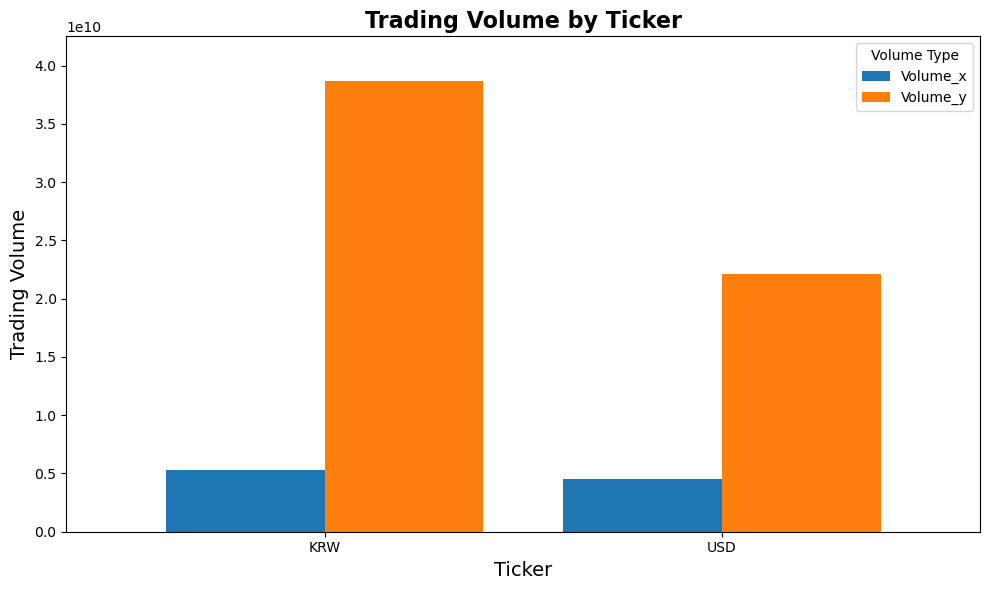

In [5]:
# Data Visualization

# set my index to the ticker
volume_data_df.set_index('ticker', inplace=True)

#plot our data 
volume_data_df[['Volume_x', 'Volume_y']].plot(kind='bar', figsize=(10, 6), color=['#1f77b4', '#ff7f0e'], width=0.8)

# Title and labels
plt.title('Trading Volume by Ticker', fontsize=16, fontweight='bold')
plt.xlabel('Ticker', fontsize=14)
plt.ylabel('Trading Volume', fontsize=14)
plt.legend(title='Volume Type')

 
#include x-ticks
plt.xticks(rotation=0)


plt.ylim(0, volume_data_df[['Volume_x', 'Volume_y']].max().max() * 1.1)

plt.tight_layout()
plt.show()

